In [23]:
def str_to_float(x,y):
    return float(x),float(y)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('clustering_data.csv')

/tmp/ipykernel_1136/1338621270.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clustering_data.csv')


In [25]:
df_ap = df[df['StateName']=='ANDHRA PRADESH']
lol = df_ap[~df_ap['Latitude'].isna() & ~df_ap['Longitude'].isna()]
lol

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477
...,...,...,...,...,...,...,...,...,...,...,...
151151,Andhra Pradesh Circle,Kurnool Region,Proddatur Division,Simhadripuram S.O,516454,PO,Delivery,Y.S.R.,ANDHRA PRADESH,14.626444,78.1294722
151152,Andhra Pradesh Circle,Kurnool Region,Proddatur Division,Vaimpalle S.O,516329,PO,Delivery,Y.S.R.,ANDHRA PRADESH,14.372833,78.4443889
151153,Andhra Pradesh Circle,Kurnool Region,Proddatur Division,Veerapunayanipalle S.O,516321,PO,Delivery,Y.S.R.,ANDHRA PRADESH,14.472083,78.4716389
153176,Andhra Pradesh Circle,Kurnool Region,Tirupati Division,Nagari S.O,517590,PO,Delivery,CHITTOOR,ANDHRA PRADESH,13.321778,79.5858333


In [26]:
def isfloat(x):
    try:
        float(x)
        return True
    except ValueError:
        print(x)
        return False
    
def preprocess_df(df):
    df = df[df['Latitude'].apply(isfloat)]
    df = df[df['Longitude'].apply(isfloat)]

    df['Latitude'] = df['Latitude'].apply(float)
    df['Longitude'] = df['Longitude'].apply(float)

    return df

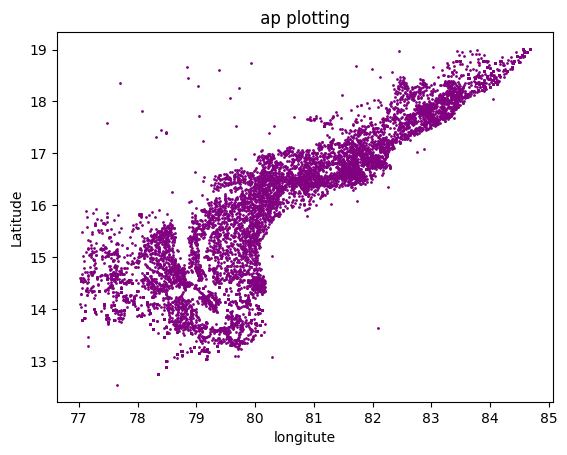

In [27]:
plt.figure()
lol_new = preprocess_df(lol)
lol_new = lol_new[(lol_new['Longitude']>77) & (lol_new['Longitude']<85) & (lol_new['Latitude']>12) & (lol_new['Latitude']<19.1)]
x = lol_new['Longitude'].values
y = lol_new['Latitude'].values
plt.scatter(x, y, color='purple', s=1, marker='o')
plt.xlabel("longitute")
plt.ylabel("Latitude")
plt.title(" ap plotting ")
plt.show()


In [37]:
import random
import math
def distance(x,y):
    x1,y1=x
    x2,y2=y
    return math.sqrt((x1-x2)**2+(y1-y2)**2)
def choose_centroids(k,df):
    data = list(zip(df['Longitude'], df['Latitude']))
    centroid=[]
    while(len(centroid)<k):
        a = random.choice(data)
        if a not in centroid:
            centroid.append(a)
    return centroid
def make_cluster(k,df,centroid):
    data = list(zip(df['Longitude'], df['Latitude']))
    clusters = [[] for _ in range(k)]
    for point in data:
        x = -1
        y=0
        mini=10000000000000000
        for cent in centroid:
            dist = distance(cent,point)
            x+=1
            if dist<mini:
                y=x
                mini=dist
        clusters[y].append(point)
    return clusters
def cluster_centroid(clusters):
    centroids=[]
    for cluster in clusters:
        sum1=0
        sum2=0
        n=0
        for a in cluster:
            sum1+=a[0]
            sum2+=a[1]
            n+=1
        centroids.append((sum1/n,sum2/n))
    return centroids
def calc(c1,c2):
    n = len(c1)
    for a in range(0,n):
        if distance(c1[a],c2[a])>0.001:
            return False
    return True
def final(k,lol_new):
    prev = []   
    curr=[]
    ok=[]
    prev = choose_centroids(k,lol_new)
    while(True):
        ok = make_cluster(k,lol_new,prev)
        curr=cluster_centroid(ok)
        if(calc(prev,curr)):
            break
        prev = curr
    return make_cluster(k,lol_new,curr)
def wcss(clusters):
    sum=0
    centroids = cluster_centroid(clusters)
    for i in range(len(centroids)):
        sum1 = 0
        for a in clusters[i]:
            sum1+=distance(a,centroids[i])**2
        sum+=sum1
    return sum     
        


<function matplotlib.pyplot.show(close=None, block=None)>

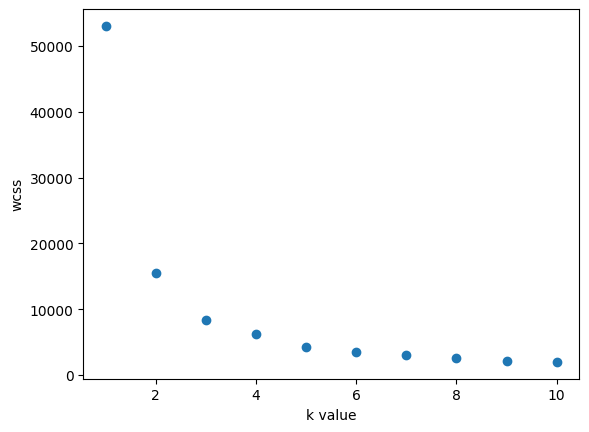

In [38]:
def elbow_plot(n,lol_new):
    wcss_list=[]
    for i in range(n):
        clusters = final(i+1,lol_new)
        wcss_list.append(wcss(clusters))
    return wcss_list

n=10
x_axis=[]
for i in range(n):
    x_axis.append(i+1)
y_axis=elbow_plot(n,lol_new)
plt.figure()
plt.scatter(x_axis,y_axis,marker='o')
plt.xlabel("k value")
plt.ylabel("wcss")
plt.show


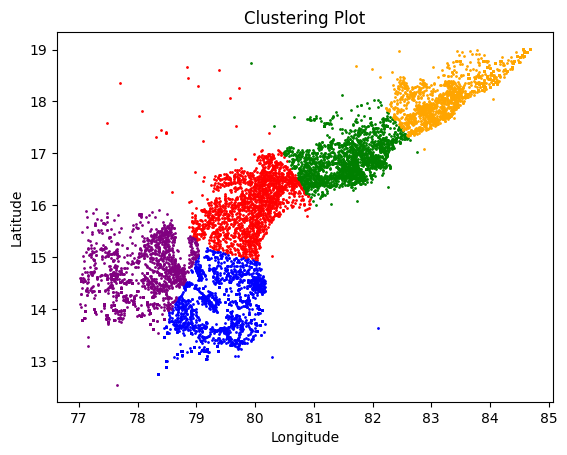

In [39]:
plt.figure()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
k=5
clusters = final(k,lol_new)

for i in range(k): 
    x = [point[0] for point in clusters[i]] 
    y = [point[1] for point in clusters[i]]  
    plt.scatter(x, y, color=colors[i], s=1, marker='o')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustering Plot")
plt.show()
    